## Linear Regression

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# %matplotlib inline..... display plots directly inside the notebook
%matplotlib inline                         

In [43]:
DF = pd.read_csv("simple_linear_regression.csv")
DF.head(15)

,Experience,Salary
0,1,30000
1,2,35000
2,3,40000
3,4,45000
4,5,50000
5,6,55000
6,7,60000
7,8,65000
8,9,70000
9,10,75000


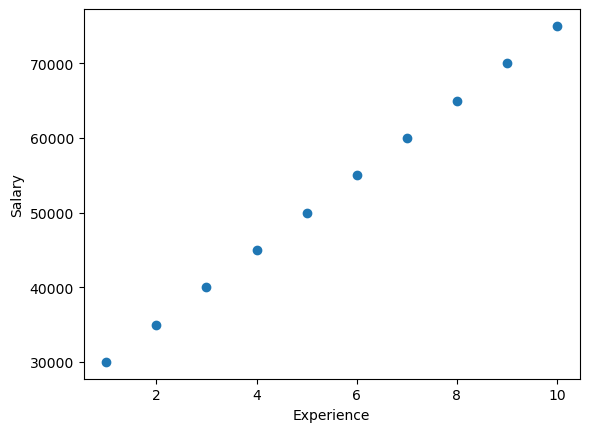

In [44]:
plt.scatter(DF['Experience'],DF['Salary'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [45]:
DF.corr()

,Experience,Salary
Experience,1.0,1.0
Salary,1.0,1.0


#### Independent And Dependent Feature 

In [46]:
X_series = DF['Experience']           # This will store values in the form of list  and 1d AS MODEL DOESNOT  SUPPORT 1D SERIES SOIT IS USELESS 
X_series  
# X_series.shape
print(X_series.shape)

X = DF[['Salary']]                    # This will store values in the form of DataFrame
X.shape

(10,)


(10, 1)

In [47]:
Y_series = DF['Salary']
Y_series

Y = DF[['Salary']]
Y

,Salary
0,30000
1,35000
2,40000
3,45000
4,50000
5,55000
6,60000
7,65000
8,70000
9,75000


#### Train Test Splitting

In [48]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)


In [49]:
X_train

,Salary
0,30000
7,65000
2,40000
9,75000
4,50000
3,45000
6,60000


#### standardization

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train
X_test

array([[ 1.24379649],
       [-1.19404463],
       [ 0.19900744]])

### Apply Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression          
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train,Y_train)


print("Coefficient or Slope :",regression.coef_)
print("intercept :",regression.intercept_)

Coefficient or Slope : [[14356.96517303]]
intercept : [52142.85714286]


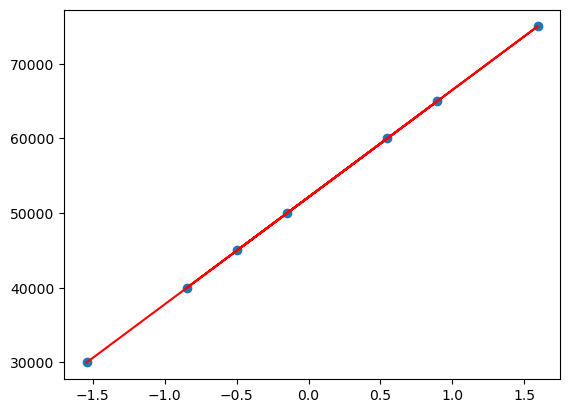

In [54]:
#### Plotting training data and best fit line 
plt.scatter(X_train,Y_train)
y_train_pred = regression.predict(X_train)
plt.plot(X_train, y_train_pred, color='red')
plt.show()

#### Prediction For Test data


In [55]:
Y_test_pred = regression.predict(X_test)

#### Performance Metrics

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(Y_test, Y_test_pred)
mae = mean_absolute_error(Y_test, Y_test_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

8.823259867232296e-23
7.275957614183426e-12
9.39322088914782e-12


In [58]:
from sklearn.metrics import r2_score
r2score = r2_score(Y_test,Y_test_pred)
print(r2score)

1.0
